In [1]:
# Imports.

import numpy as np
import matplotlib.pyplot as plt
from random import uniform

In [2]:
# Files and functions.

loaf = np.loadtxt('data/Loaf.txt')

pulsar = np.loadtxt('data/Pulsar.txt')

pentadecathlon = np.loadtxt('data/Pentadecathlon.txt')

seeds = [loaf, pulsar, pentadecathlon]

def centre(worldarray):
    ilist = []
    jlist = []
    for site in worldarray:
        ilist.append(site[1])
        jlist.append(site[0])
    if len(ilist) == 0:
        ilist.append(0)
        jlist.append(0)
    centi = np.mean(ilist)
    centj = np.mean(jlist)
    cent = [centi, centj]
    return cent

def radmax(worldarray):
    rs = []
    for i in worldarray:
        rs.append(np.sqrt(((i[1] - centre(worldarray)[0]) ** 2)+((i[0] - centre(worldarray)[1]) ** 2)))
    if len(rs) > 0:
        rmax = max(rs)
    else:
        rmax = 0
    return rmax

def vicinity(cell):
    """
    Assigns coordinnates to surrounding cells.
    Inputs: cell, a tuple element of a set.
    Outputs: coordinates of the surrounding cells.
    """
    x, y = cell # Extracts the x and y coordinate from the tuple 'cell'.
    yield x - 1, y + 1 # Upper left.
    yield x, y + 1 # Above.
    yield x + 1, y + 1 # Upper right.
    yield x - 1, y # Left.
    yield x + 1, y # Right.
    yield x - 1, y - 1 # Lower left.
    yield x, y - 1 # Below.
    yield x + 1, y - 1 # Lower right.

def step(worldset):
    newset = set([])
    candidates = worldset.union(set(n for cell in worldset for n in vicinity(cell))) # Establishes a set of all living cells and all their neighbours.
    for cell in candidates:
        count = sum((n in worldset) for n in vicinity(cell))
        if count == 3 or (count == 2 and cell in worldset):
            newset.add(cell)
    return newset

def image(worldarray, n):
    """
    
    """
    nlabel = str(n)
    if len(worldarray) > 0:
        d = (2 * int(max(centre(worldarray))) + 1)
    else:
        d = 40
    blank = np.zeros((d, d))
    offset = int((d / 4) + 1)
    np.roll(blank, offset, axis=(0,1))
    for site in worldarray:
        blank[site[0]][site[1]] = 1
    plt.figure()
    plt.title('n = ' + nlabel)
    plt.imshow(blank, interpolation='nearest')
    return

def evolution(seedarray, n):
    seedset = array2set(seedarray)
    check0 = seedset
    pop0 = len(seedarray)
    cent0 = centre(seedarray)
    rmax0 = radmax(seedarray)
    states = [seedarray]
    centres = [cent0]
    rmaxs = [rmax0]
    times = [0]
    pops = [pop0]
    uid0 = uniqueid(set2array(seedset))
    uids = [uid0]
    #print(uid0)
    image(seedarray, 0)
    for i in range(n):
        check2 = seedset
        seedset = step(seedset)
        worldset = seedset
        check3 = worldset
        worldarray = set2array(worldset)
        states.append(worldarray)
        centres.append(centre(worldarray))
        rmaxs.append(radmax(worldarray))
        times.append(i + 1)
        pops.append(len(worldarray))
        uid = uniqueid(worldarray)
        #print(uid)
        image(worldarray, i + 1)

        # Stops loop if periodic from start.
        if check3 == check0:
            period = i + 1
            #uids.append(uid)
            print('Period of oscillation: ', period)
            break

        # Stops loop if colony dies.
        elif len(check3) == 0:
            lifetime = i + 1
            uids.append(uid)
            print('World died after ', lifetime, ' iteration(s).')
            break

        # Stops loop if colony becomes still life.
        elif check3 == check2:
            timetostill = i
            uids.append(uid)
            print('Still life achieved after ', timetostill, ' iteration(s).')
            break

        # Stops loop if colony becomes periodic.
        elif uid in uids:
            timetoosc = i
            print('Became oscillator after ', timetoosc, ' iteration(s).')
            break

        # Continues loop if colony is still evolving.
        else:
            uids.append(uid)
            continue

    plt.figure()
    plt.title('Population Over Time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('Population') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, pops, 'bo--')
    plt.figure()
    plt.title('Maximum Radius Over Time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('rmax') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, rmaxs, 'ro--')
    return

def set2array(worldset):
    return np.array(tuple(worldset))

def reduce(seed):
    """
    Reduces a seed array eg loaf to a smaller array where each row is the coordinates of a living cell.
    Inputs: seed, a two dimensional array of zeros and ones.
    Outputs: a two dimensional array of coordinates.
    """
    return np.argwhere(seed > 0)

def array2set(worldarray):
    worldset = set([])
    for i in worldarray:
        element = tuple(i)
        worldset.add(element)
    return worldset

def initialstate(seedarray):
    image(seedarray, 0)
    pop = len(seedarray)
    cent = centre(seedarray)
    rmax = radmax(seedarray)
    print('%s %d' %('Start population: ', pop))
    print('%s %s %.2f %s %.2f %s' %('Centre position: ', '(',cent[0],',',cent[1],')'))
    print('%s %.2f' %('Max radius: ', rmax))
    print()

def uniqueid(worldarray):
    uid = 0
    for site in worldarray:
        uid += (site[0])
        uid -= (site[1])
    uid += radmax(worldarray) + centre(worldarray)[0] + len(worldarray)
    if len(worldarray) > 0:
        uid += (max(worldarray[-1]))
        uid -= (max(worldarray[0]))
        uid += (min(worldarray[0]))
        uid -= (max(worldarray[-1]))
    else:
        uid = 0
    return uid


Start population:  7
Centre position:  ( 7.71 , 7.29 )
Max radius:  1.74

Start population:  48
Centre position:  ( 8.00 , 8.00 )
Max radius:  7.21

Start population:  12
Centre position:  ( 14.50 , 7.00 )
Max radius:  4.50



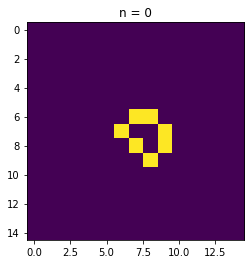

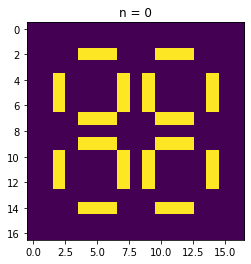

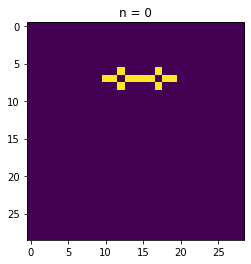

In [3]:
# Initial states.

for seed in seeds:
    initialstate(reduce(seed))

Period of oscillation:  1


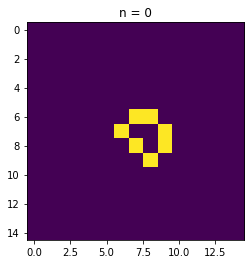

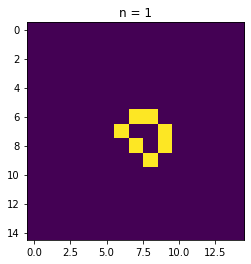

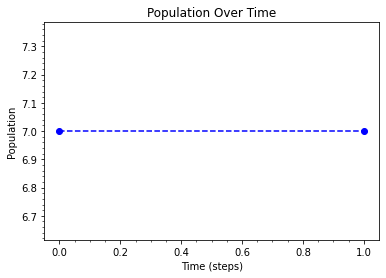

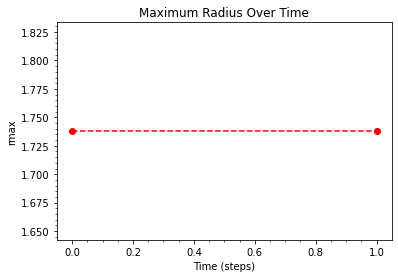

In [4]:
# Loaf evolution.

evolution(reduce(loaf), 1000)

Period of oscillation:  3


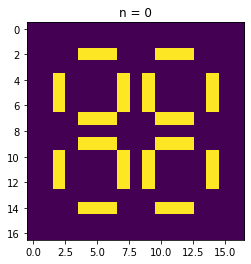

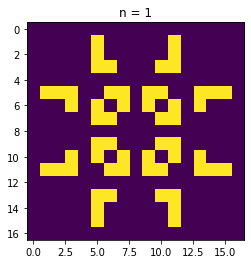

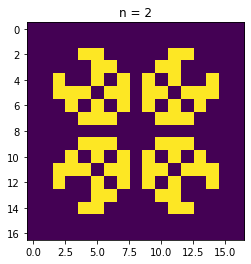

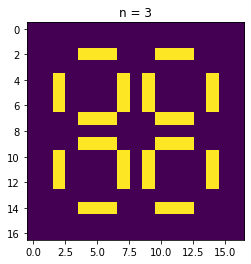

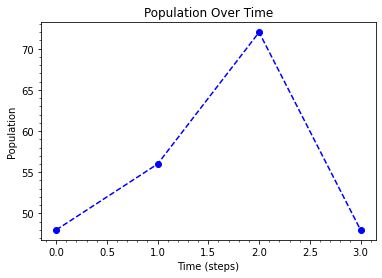

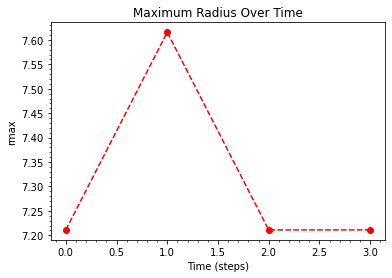

In [5]:
# Pulsar evolution.

evolution(reduce(pulsar), 1000)

Became oscillator after  12  iteration(s).


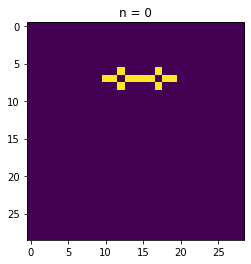

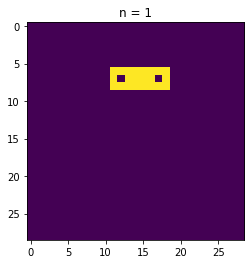

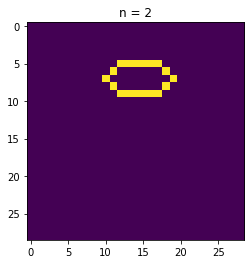

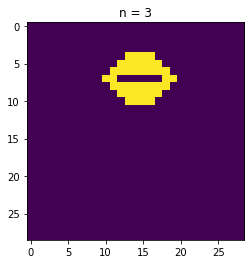

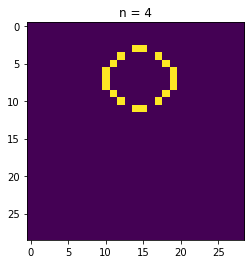

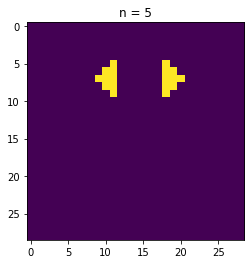

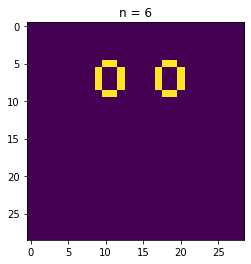

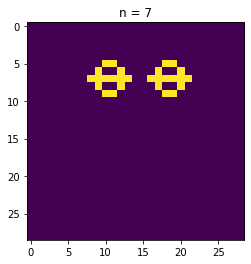

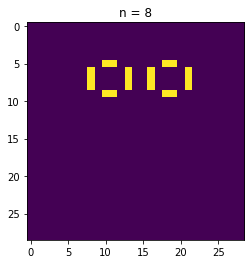

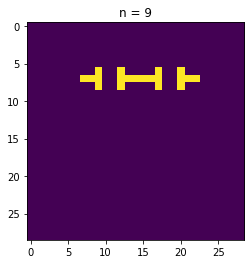

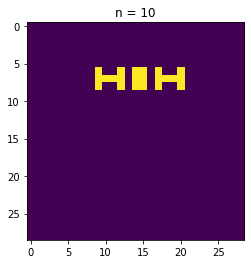

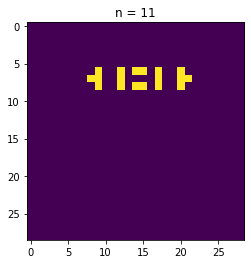

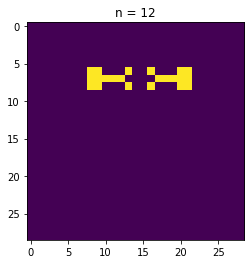

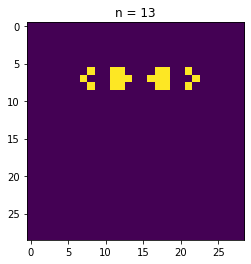

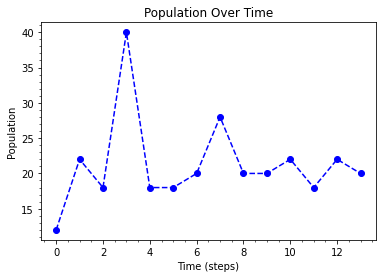

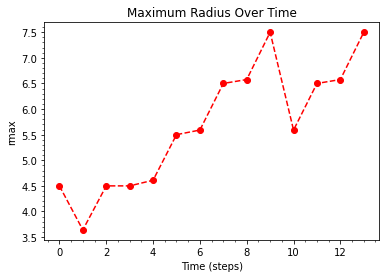

In [6]:
# Pentadecathlon evolution.

evolution(reduce(pentadecathlon), 1000)

In [7]:
# Random seeds.

def randseedset(n):
    seedset = set([])
    while len(seedset) < n:
        x, y = int(uniform(10,31)), int(uniform(10,31))
        cell = (x, y)
        seedset.add(cell)
    return seedset

# Below are adapted versions of some functions to alow for a set universe size.

def image_d(worldarray, n, d):
    nlabel = str(n)
    """
    Version of image function that takes universe dimension as
    an additional input rather than scaling the space continuously.
    """
    blank = np.zeros((d, d))
    offset = int((d / 4) + 1)
    np.roll(blank, offset, axis=(0,1))
    for site in worldarray:
        blank[site[0]][site[1]] = 1
    plt.figure()
    plt.title('n = ' + nlabel)
    plt.imshow(blank, interpolation='nearest')
    return

def initialstate_d(seedarray, d):
    image_d(seedarray, 0, d)
    pop = len(seedarray)
    cent = centre(seedarray)
    rmax = radmax(seedarray)
    print('%s %d' %('Start population: ', pop))
    print('%s %s %.2f %s %.2f %s' %('Centre position: ', '(',cent[0],',',cent[1],')'))
    print('%s %.2f' %('Max radius: ', rmax))
    print()

def evolution_d(seedarray, n, d):
    seedset = array2set(seedarray)
    check0 = seedset
    pop0 = len(seedarray)
    cent0 = centre(seedarray)
    rmax0 = radmax(seedarray)
    states = [seedarray]
    centres = [cent0]
    rmaxs = [rmax0]
    times = [0]
    pops = [pop0]
    uid0 = uniqueid(set2array(seedset))
    uids = [uid0]
    #print(uid0)
    image_d(seedarray, 0, d)
    for i in range(n):
        check2 = seedset
        seedset = step(seedset)
        worldset = seedset
        check3 = worldset
        worldarray = set2array(worldset)
        states.append(worldarray)
        centres.append(centre(worldarray))
        rmaxs.append(radmax(worldarray))
        times.append(i + 1)
        pops.append(len(worldarray))
        uid = uniqueid(worldarray)
        #print(uid)
        image_d(worldarray, i + 1, d)

        # Stops loop if periodic from start.
        if check3 == check0:
            period = i + 1
            #uids.append(uid)
            print('Period of oscillation: ', period)
            break

        # Stops loop if colony dies.
        elif len(check3) == 0:
            lifetime = i + 1
            uids.append(uid)
            print('World died after ', lifetime, ' iteration(s).')
            break

        # Stops loop if colony becomes still life.
        elif check3 == check2:
            timetostill = i
            uids.append(uid)
            print('Still life achieved after ', timetostill, ' iteration(s).')
            break

        # Stops loop if colony becomes periodic.
        elif uid in uids:
            timetoosc = i
            print('Became oscillator after ', timetoosc, ' iteration(s).')
            break

        # Continues loop if colony is still evolving.
        else:
            uids.append(uid)
            continue

    plt.figure()
    plt.title('Population over time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('Population') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, pops, 'bo--')
    plt.figure()
    plt.title('Maximum radius over time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('rmax') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, rmaxs, 'ro--')
    return

Still life achieved after  1  iteration(s).


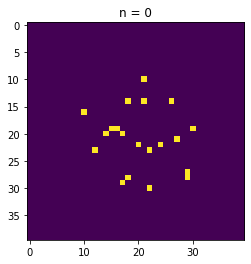

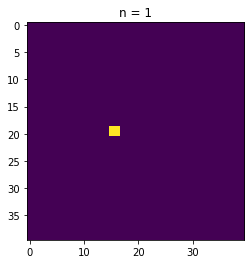

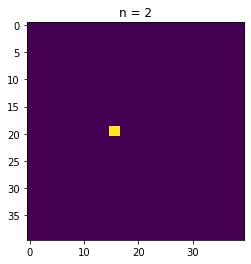

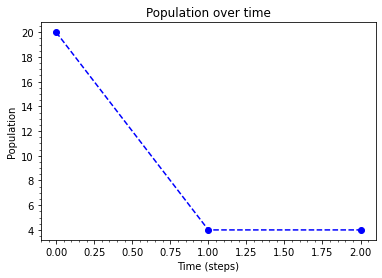

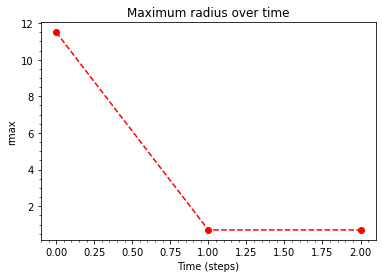

In [8]:
# Evolution20

seedset20 = randseedset(20)
seedarray20 = set2array(seedset20)

evolution_d(seedarray20, 100, 40)

Still life achieved after  3  iteration(s).


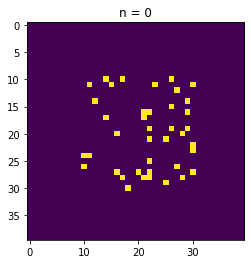

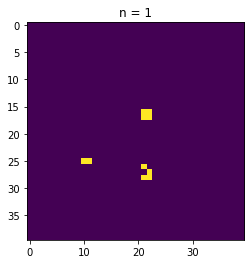

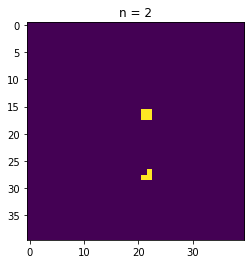

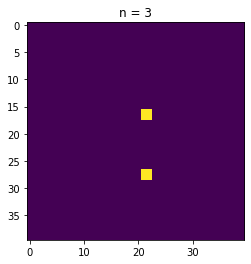

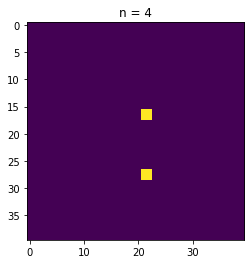

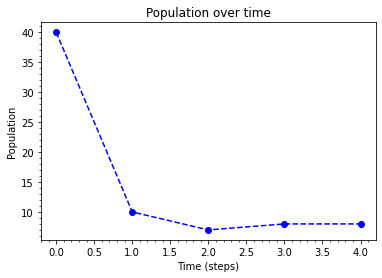

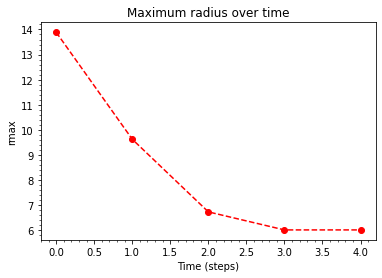

In [9]:
# Evolution40

seedset40 = randseedset(40)
seedarray40 = set2array(seedset40)

evolution_d(seedarray40, 100, 40)

<ipython-input-7-e647c4852af3>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Still life achieved after  29  iteration(s).


<ipython-input-7-e647c4852af3>:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-7-e647c4852af3>:107: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


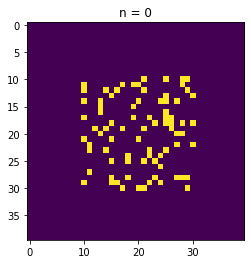

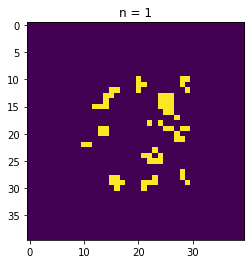

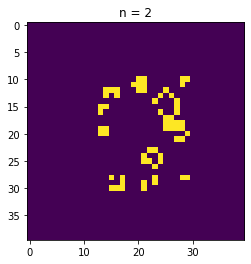

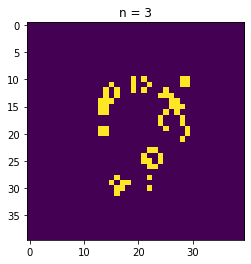

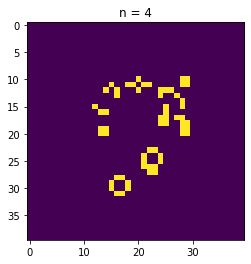

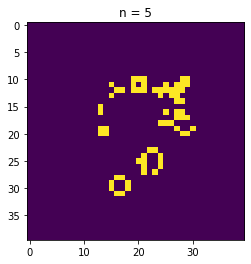

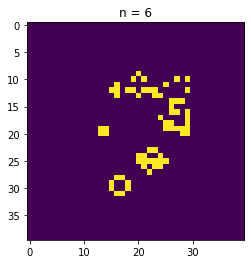

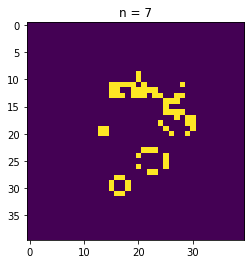

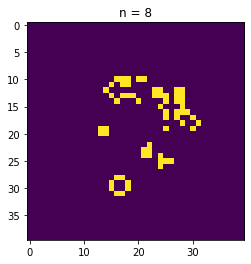

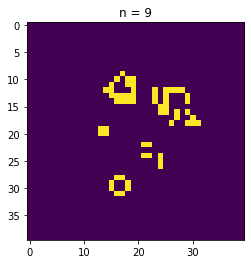

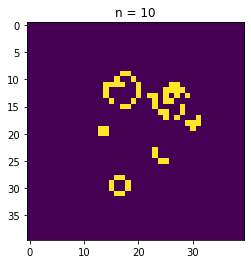

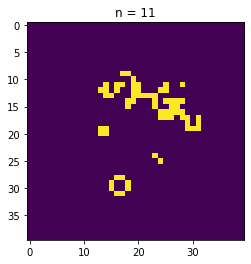

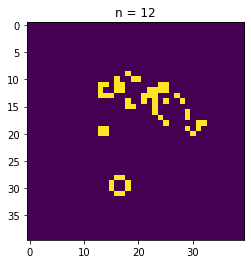

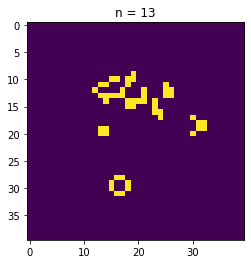

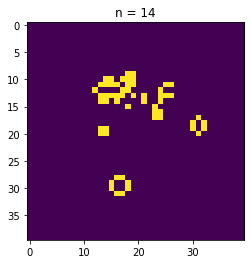

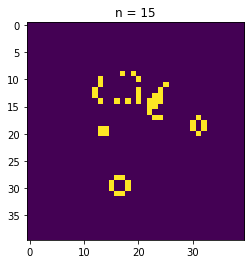

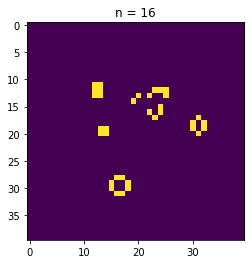

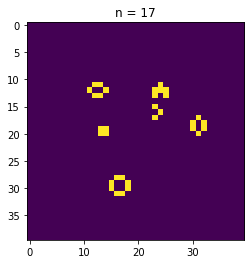

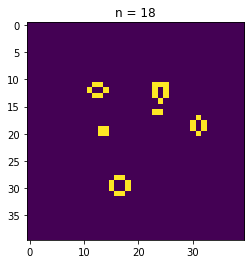

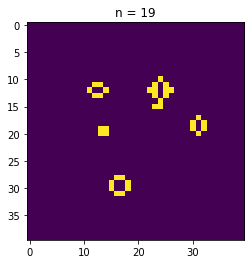

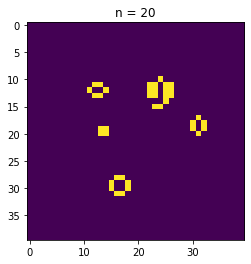

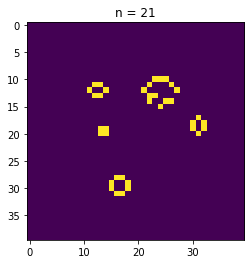

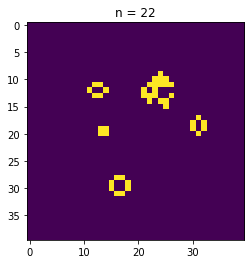

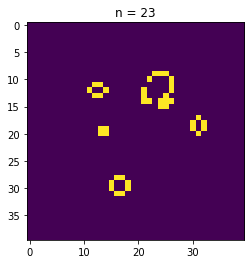

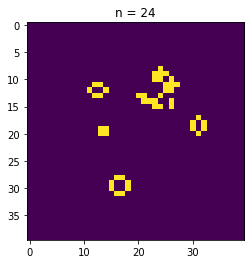

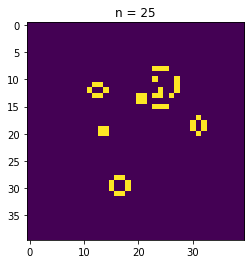

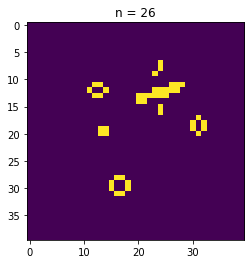

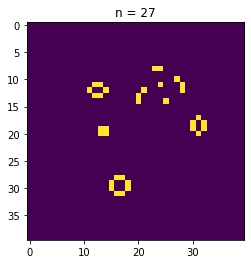

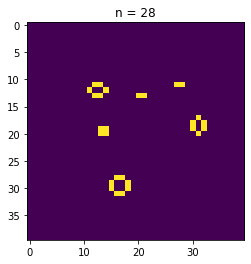

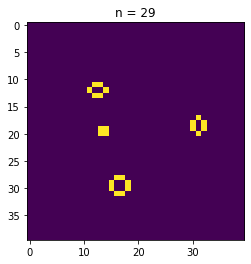

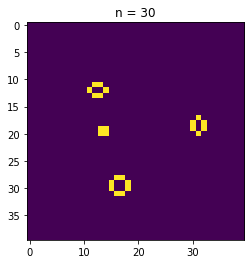

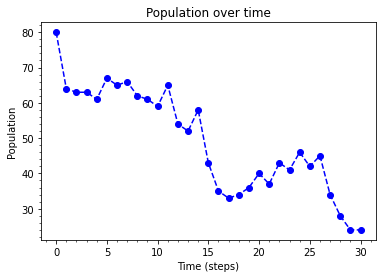

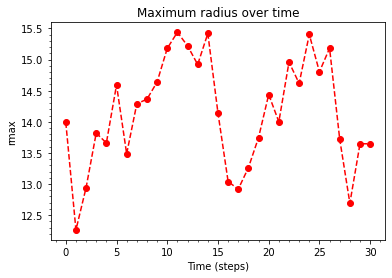

In [10]:
# Evolution80

seedset80 = randseedset(80)
seedarray80 = set2array(seedset80)

evolution_d(seedarray80, 100, 40)

In [11]:
# Study of random configurations.
# Previous functions are copied here so some may be optimised.

def vicinity(cell):
    """
    Assigns coordinnates to surrounding cells.
    Inputs: cell, a tuple element of a set.
    Outputs: coordinates of the surrounding cells.
    """
    x, y = cell # Extracts the x and y coordinate from the tuple 'cell'.
    yield x - 1, y + 1 # Upper left.
    yield x, y + 1 # Above.
    yield x + 1, y + 1 # Upper right.
    yield x - 1, y # Left.
    yield x + 1, y # Right.
    yield x - 1, y - 1 # Lower left.
    yield x, y - 1 # Below.
    yield x + 1, y - 1 # Lower right.

def step(worldset):
    newset = set([])
    candidates = worldset.union(set(n for cell in worldset for n in vicinity(cell))) # Establishes a set of all living cells and all their neighbours.
    for cell in candidates:
        count = sum((n in worldset) for n in vicinity(cell))
        if count == 3 or (count == 2 and cell in worldset):
            newset.add(cell)
    return newset

def radmax(worldarray):
    rs = []
    cent = [centre(worldarray)[0], centre(worldarray)[1]]
    for i in worldarray:
        rs.append(np.sqrt(((i[1] - cent[0]) ** 2)+((i[0] - cent[1]) ** 2)))
    if len(rs) > 0:
        rmax = max(rs)
    else:
        rmax = 0
    return rmax

def centre(worldarray):
    ilist = []
    jlist = []
    for site in worldarray:
        ilist.append(site[1])
        jlist.append(site[0])
    if len(ilist) == 0:
        ilist.append(0)
        jlist.append(0)
    centi = np.mean(ilist)
    centj = np.mean(jlist)
    cent = [centi, centj]
    return cent

def uniqueid(worldarray):
    uid = 0
    for site in worldarray:
        uid += (site[0])
        uid -= (site[1])
    uid += radmax(worldarray) + centre(worldarray)[0] + len(worldarray)
    if len(worldarray) > 0:
        uid += (max(worldarray[-1]))
        uid -= (max(worldarray[0]))
        uid += (min(worldarray[0]))
        uid -= (max(worldarray[-1]))
    else:
        uid = 0
    return uid

def set2array(worldset):
    return np.array(tuple(worldset))

def reduce(seed):
    """
    Reduces a seed array eg loaf to a smaller array where each row is the coordinates of a living cell.
    Inputs: seed, a two dimensional array of zeros and ones.
    Outputs: a two? dimensional array of coordinates.
    """
    return np.argwhere(seed > 0)

def array2set(worldarray):
    worldset = set([])
    for i in worldarray:
        element = tuple(i)
        worldset.add(element)
    return worldset

def randseedset(n):
    seedset = set([])
    while len(seedset) < n:
        x, y = int(uniform(10,31)), int(uniform(10,31))
        cell = (x, y)
        seedset.add(cell)
    return seedset

def sampleseeds(cells, seeds):
    ensemble = []
    for i in range(seeds):
        seedset = randseedset(cells)
        seedarray = set2array(seedset)
        ensemble.append(seedarray)
    return ensemble

def evolution_study(seedarray, steps):
    seedset = array2set(seedarray)
    check0 = seedset
    pop0 = len(seedarray)
    rmax0 = radmax(seedarray)
    rmaxs = [rmax0]
    pops = [pop0]
    uid0 = uniqueid(set2array(seedset))
    uids = [uid0]
    for i in range(steps):
        check2 = seedset
        seedset = step(seedset)
        worldset = seedset
        check3 = worldset
        worldarray = set2array(worldset)
        rmaxs.append(radmax(worldarray))
        pops.append(len(worldarray))
        uid = uniqueid(worldarray)
        # Stops loop if periodic from start.
        if check3 == check0:
            break
        # Stops loop if colony dies.
        elif len(check3) == 0:
            uids.append(uid)
            break
        # Stops loop if colony becomes still life.
        elif check3 == check2:
            uids.append(uid)
            break
        # Stops loop if colony becomes periodic.
        elif uid in uids:
            break
        # Continues loop if colony is still evolving.
        else:
            uids.append(uid)
            continue
    endrmax = rmaxs[-1]
    endpop = pops[-1]
    enduid = uids[-1]
    while len(rmaxs) < (steps + 1):
        rmaxs.append(endrmax)
        pops.append(endpop)
        uids.append(enduid)
    lists = [rmaxs, pops, uids]
    return lists

def study(cells, seeds, steps):
    """
    Analyses an ensemble of n seeds each with a start population of n cells
    over a time period of n steps.
    """
    ensemble = sampleseeds(cells, seeds)
    enspops = np.zeros((steps + 1, seeds))
    ensrmaxs = np.zeros((steps + 1, seeds))
    ensrmss = np.zeros((steps + 1, seeds))
    seedind = 0
    t = [0, 50, 100, 200]

    for seedarray in ensemble:
        lists = evolution_study(seedarray, steps)
        rmaxs = lists[0]
        pops = lists[1]
        uids = lists[2]
        enspops[:, seedind] = pops
        ensrmaxs[:, seedind] = rmaxs
        seedind += 1

    pop0 = np.mean(enspops[0, :])
    pop50 = np.mean(enspops[50, :])
    pop100 = np.mean(enspops[100, :])
    pop200 = np.mean(enspops[200, :])
    
    rmax0 = np.mean(ensrmaxs[0, :])
    rmax50 = np.mean(ensrmaxs[50, :])
    rmax100 = np.mean(ensrmaxs[100, :])
    rmax200 = np.mean(ensrmaxs[200, :])
    
    rms0 = np.sqrt(np.mean(np.square(enspops[0, :])))
    rms50 = np.sqrt(np.mean(np.square(enspops[50, :])))
    rms100 = np.sqrt(np.mean(np.square(enspops[100, :])))
    rms200 = np.sqrt(np.mean(np.square(enspops[200, :])))
    
    meanpops = [pop0, pop50, pop100, pop200]
    rmspops = [rms0, rms50, rms100, rms200]
    meanrmaxs = [rmax0, rmax50, rmax100, rmax200]
    
    plt.figure() # Opens a new figure.
    plt.title('Mean Population of Ensemble Over Time') # Adds a title to the plot.
    plt.plot(t, meanpops, 'bo--') # Plots mean population against time.
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('Population') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    
    plt.figure() # Opens a new figure.
    plt.title('RMS Population of Ensemble Over Time') # Adds a title to the plot.
    plt.plot(t, rmspops, 'go--') # Plots rms population against time.
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('Population') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    
    plt.figure() # Opens a new figure.
    plt.title('Mean Maximum Radius of Ensemble Over Time') # Adds a title to the plot.
    plt.plot(t, meanrmaxs, 'ro--') # Plots max radius against time.
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('rmax') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    return


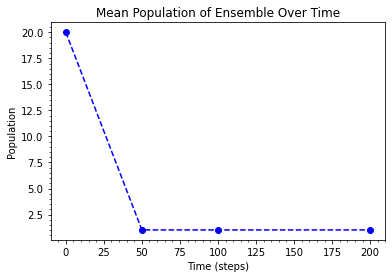

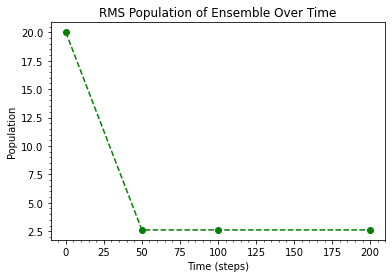

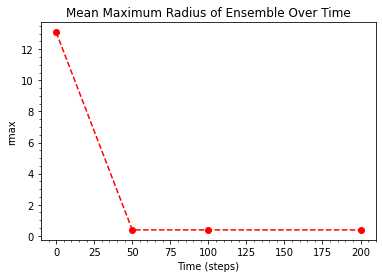

In [12]:
# Ensemble 20.

%prun study(20, 100, 200)

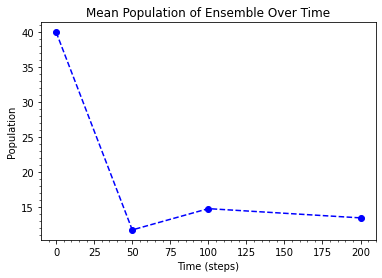

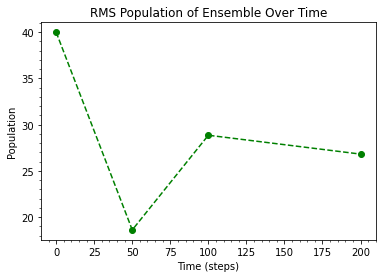

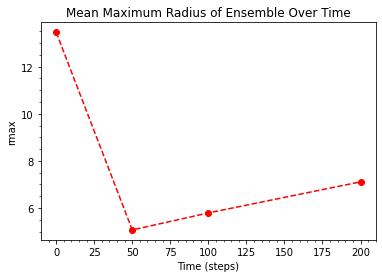

In [13]:
# Ensemble 40.

%prun study(40, 100, 200)

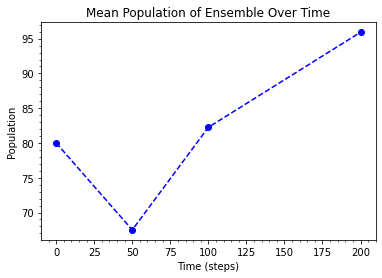

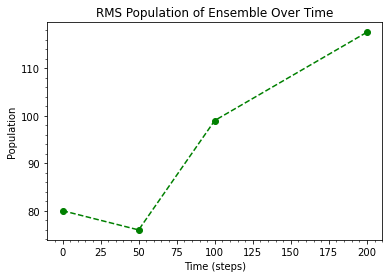

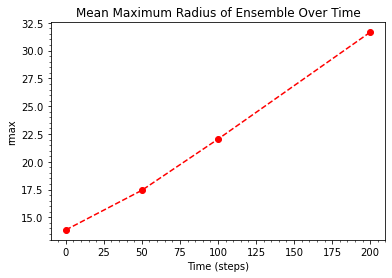

In [14]:
# Ensemble 80.

%prun study(80, 100, 200)

## 4: Game of life animations :  [5 marks]


For the following patterns present in the data folder:
- Glider ("data/Glider.txt") produces one figure for each of the first 15 steps of its evolution
- GliderGun ("data/GliderGun.txt") produce an animation (~60 frames, one frame per time step)

<img align="bottom" src="GliderGun.gif" HEIGHT="400" WIDTH="400">

In [15]:
# Animations

%matplotlib inline
plt.rcParams['figure.figsize'] = 3, 3
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

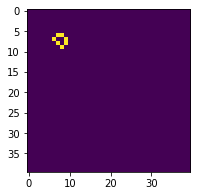

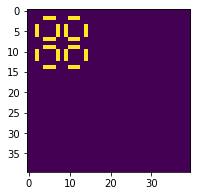

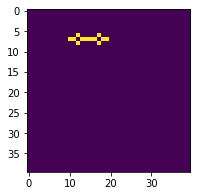

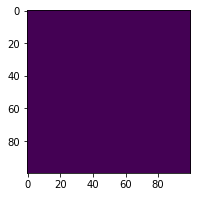

In [16]:
# Method 1 (inefficient.)

def image_anim(worldarray, d):
    """
    
    """
    blank = np.zeros((d, d))
    offset = int((d / 4) + 1)
    np.roll(blank, offset, axis=(0,1))
    for site in worldarray:
        blank[site[0]][site[1]] = 1
    im = plt.imshow(blank, animated=True)
    return im

def animate(worldarray, noframes, interval, d):
    """
    
    """
    fig = plt.figure()
    im0 = image_anim(worldarray, d)
    ims = [[im0]]
    for i in range(noframes):
        worldset = array2set(worldarray)
        newset = step(worldset)
        worldarray = set2array(newset)
        im = image_anim(worldarray, d)
        ims.append([im])
    anim = animation.ArtistAnimation(fig, ims, interval, blit=True)
    display(anim)
    return

# Tests.
animate(reduce(loaf), 3, 150, 40)
animate(reduce(pulsar), 3, 150, 40)
animate(reduce(pentadecathlon), 15, 150, 40)

# Test on random seed.
randset = randseedset(40)
randarray = set2array(randset)

animate(randarray, 60, 60, 100)

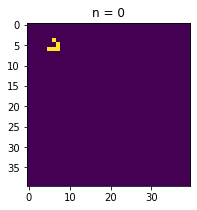

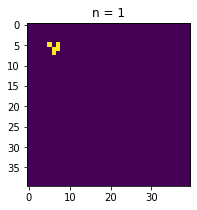

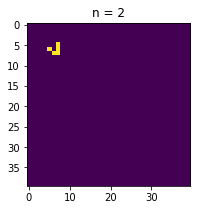

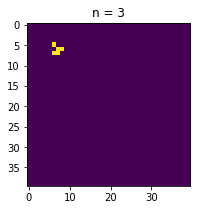

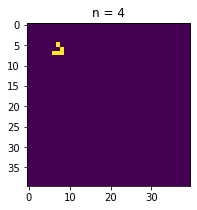

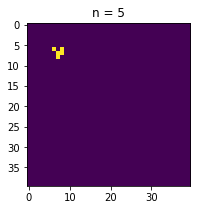

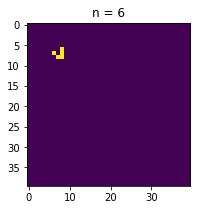

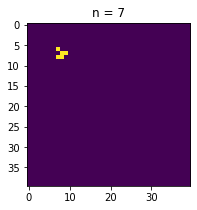

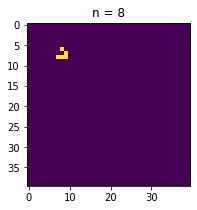

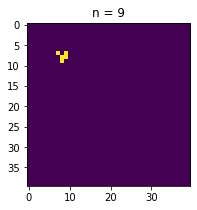

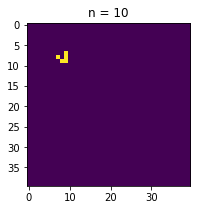

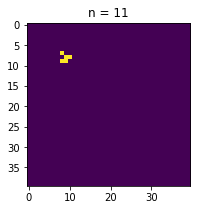

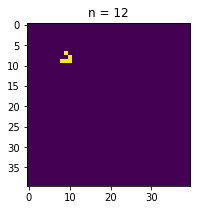

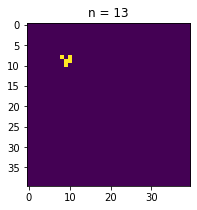

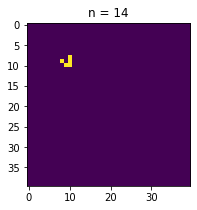

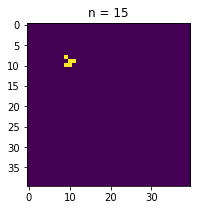

In [17]:
# Load files.
glider = np.loadtxt('data/Glider.txt')
glidergun = np.loadtxt('data/GliderGun.txt')

# First 15 steps of glider.
def figures(worldarray, n, d):
    """
    
    """
    plt.figure()
    plt.title('n = ' + str(0))
    im0 = image_anim(worldarray, d)
    ims = [[im0]]
    for i in range(n):
        worldset = array2set(worldarray)
        newset = step(worldset)
        worldarray = set2array(newset)
        plt.figure()
        plt.title('n = ' + str(i + 1))
        im = image_anim(worldarray, d)
    return

figures(reduce(glider), 15, 40)

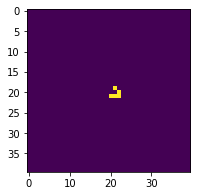

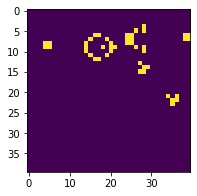

In [18]:
# Gliders.

animate(reduce(glider), 60, 60, 40)
animate(reduce(glidergun), 60, 60, 40)

In [19]:
# Method 2 (efficient).
"""
def animatefunction(inputFrames,inputInterval):
    fig = plt.figure()
    im = plt.imshow(worldarray, animated=True)
    def animationFrames():
        localx=x
        localy=y
        for i in range(inputFrames):
            localx += np.pi / 15.
            localy += np.pi / 20.
            yield generatedata(localx,localy)

    def animate(input):
        im.set_data(input)
        return (im,)

    # Create the animation.
    anim=animation.FuncAnimation(fig, func=animate, frames=animationFrames,interval=inputInterval,blit=True)
    return anim

anim=animateFunction(30, 30)
display(anim)
"""

'\ndef animatefunction(inputFrames,inputInterval):\n    fig = plt.figure()\n    im = plt.imshow(worldarray, animated=True)\n    def animationFrames():\n        localx=x\n        localy=y\n        for i in range(inputFrames):\n            localx += np.pi / 15.\n            localy += np.pi / 20.\n            yield generatedata(localx,localy)\n\n    def animate(input):\n        im.set_data(input)\n        return (im,)\n\n    # Create the animation.\n    anim=animation.FuncAnimation(fig, func=animate, frames=animationFrames,interval=inputInterval,blit=True)\n    return anim\n\nanim=animateFunction(30, 30)\ndisplay(anim)\n'

## 5: HighLife [7 marks]

Conway's Life is classified as following the $\textbf{B}$3/$\textbf{S}$23 rule.

Specifically a cell:
- is $\textbf{B}$orn if it has exactly 3 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours
- it dies otherwise.

Another member in the family of "Life" cellular automata is ``HighLife`` that follow the $\textbf{B}$36/$\textbf{S}$23 rule.

A cell:
- is $\textbf{B}$orn if it has 3 or 6 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours
- it dies otherwise.


Following the HighLife rules and  employing the Replicator pattern present in the data folder ("data/Replicator.txt").

1. Evolve it for N=36
2. Produce an animation of the above 36 frames showing the system evolution
3. Plot the Number of cells versus time
4. Plot the  $r_{max}$ as a function of time
5. Can you see why it is called a "Replicator"?

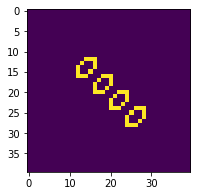

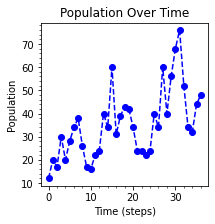

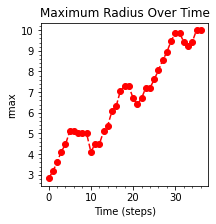

In [20]:
replicator = np.loadtxt('data/Replicator.txt')
rep = reduce(replicator)

def hlstep(worldset):
    """
    HighLife step
    New version of step with the rules of HighLife.
    """
    newset = set([])
    candidates = worldset.union(set(n for cell in worldset for n in vicinity(cell))) # Establishes a set of all living cells and all their neighbours.
    for cell in candidates:
        count = sum((n in worldset) for n in vicinity(cell))
        if ((count == 3 or count == 2) and cell in worldset) or ((count == 3 or count == 6) and cell not in worldset):
            newset.add(cell)
    return newset

def hlfigures(worldarray, n, d):
    """
    New version of figures calling hlstep.
    """
    plt.figure()
    plt.title('n = ' + str(0))
    im0 = image_anim(worldarray, d)
    ims = [[im0]]
    for i in range(n):
        worldset = array2set(worldarray)
        newset = hlstep(worldset)
        worldarray = set2array(newset)
        plt.figure()
        plt.title('n = ' + str(i + 1))
        im = image_anim(worldarray, d)
    return

def highlife(worldarray, nframes, interval, d):
    """
    Evolves and analyses a (reduced) seed array.
    Inputs: 
    worldarray - an array of coordinates for each living cell, 
                 obtained by calling reduce on a txt file.
    nframes    - number of frames/time steps to evolve over.
    interval   - duration of the animation.
    d          - the dimension of the square bounding box.
    Outputs:
    An animation of the colony over time, a still of it's end state
    and plots of population and rmax against time.
    """
    rmax0 = radmax(worldarray)
    pop0 = len(worldarray)
    rmaxs = [rmax0]
    times = [0]
    pops = [pop0]
    fig = plt.figure()
    im0 = image_anim(worldarray, d)
    ims = [[im0]]
    for i in range(nframes):
        times.append(i + 1)
        worldset = array2set(worldarray)
        newset = hlstep(worldset)
        worldarray = set2array(newset)
        rmaxs.append(radmax(worldarray))
        pops.append(len(worldarray))
        im = image_anim(worldarray, d)
        ims.append([im])
    anim = animation.ArtistAnimation(fig, ims, interval, blit=True)
    display(anim)
    plt.figure()
    plt.title('Population Over Time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('Population') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, pops, 'bo--')
    plt.figure()
    plt.title('Maximum Radius Over Time')
    plt.xlabel('Time (steps)') # Labels the x axis.
    plt.ylabel('rmax') # Labels the y axis.
    plt.gca().minorticks_on() # Displays minor ticks on the axes.
    plt.plot(times, rmaxs, 'ro--')
    return

highlife(rep, 36, 360, 40)

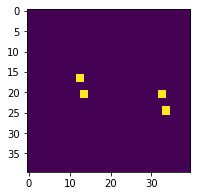

In [21]:
galaxy = np.array([[15, 27],[22, 23],[23, 22], [20, 29], [13, 17],[27, 17],[18, 19], [20, 12],[16, 10],[20, 21],[12, 13],[14, 18],[22, 16],[19, 14],[20, 30],[14, 14],[12, 10],[23, 25],[27, 23],[11, 30],[30, 14],[23, 10],[25, 25],[18, 17],[11, 21],[19, 13],[17, 13],[25, 21],[25, 28],[21, 25],[20, 23],[21, 15],[10, 25],[18, 29],[11, 20],[12, 30],[21, 10],[26, 10],[19, 23],[10, 29]])

animate(galaxy, 80, 250, 40)

In [23]:
"""# Method 2 (efficient).

# Function animation is a bit more efficient.
# It can create the frames on demand
# but has a more elaborate usage interface.

# There is a callable/function ("func" argument)
# that is called for each frame.

# The 1st argument for the above callable/function is taken to be
# the return value of the "frames" argument.
# This can be an iterator (i.e for i in range(x))
# or a function that itself generates frames

def animateFunction(inputFrames,inputInterval):
    fig = plt.figure()
    #Get the image "artist"
    x = np.linspace(0, 2 * np.pi, 30)
    y = np.linspace(0, 2 * np.pi, 25).reshape(-1, 1)
    im = plt.imshow(generatedata(x, y), animated=True)

    def animationFrames():
        localx=x
        localy=y
        for i in range(inputFrames):
            localx += np.pi / 15.
            localy += np.pi / 20.
            yield generatedata(localx,localy)

    def animate(input):
        im.set_data(input)
        return (im,)

    # Create the animation.
    anim=animation.FuncAnimation(fig, func=animate, frames=animationFrames,interval=inputInterval,blit=True)
    return anim

anim=animateFunction(30, 30)
display(anim)"""

'# Method 2 (efficient).\n\n# Function animation is a bit more efficient.\n# It can create the frames on demand\n# but has a more elaborate usage interface.\n\n# There is a callable/function ("func" argument)\n# that is called for each frame.\n\n# The 1st argument for the above callable/function is taken to be\n# the return value of the "frames" argument.\n# This can be an iterator (i.e for i in range(x))\n# or a function that itself generates frames\n\ndef animateFunction(inputFrames,inputInterval):\n    fig = plt.figure()\n    #Get the image "artist"\n    x = np.linspace(0, 2 * np.pi, 30)\n    y = np.linspace(0, 2 * np.pi, 25).reshape(-1, 1)\n    im = plt.imshow(generatedata(x, y), animated=True)\n\n    def animationFrames():\n        localx=x\n        localy=y\n        for i in range(inputFrames):\n            localx += np.pi / 15.\n            localy += np.pi / 20.\n            yield generatedata(localx,localy)\n\n    def animate(input):\n        im.set_data(input)\n        return 